In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [2]:
db=pd.read_csv('Diabetes data.txt')
db

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
#goal is to predict if someone has diabetes or not,using KNN,in outcome column, 0-> no diabetes, 1->yes diabetes
#DV->Outcome
#IV-> Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age

In [5]:
db1=db.copy() #it's a best practice to have back up

In [6]:
db1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
db1['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [8]:
#loop for replacing all troublesome 0s
for column in ['Pregnancies','Glucose','BloodPressure','Insulin','SkinThickness','BMI']:
    Mean=db1[column].mean()
    db1[column]=db1[column].replace(0,Mean)
db1.describe()   

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.400782,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,2.984162,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.845052,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
db1.iloc[:,:8].corr() #no multicollinearity

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.152568,0.253275,0.045776,-0.016738,0.097663,-0.010297,0.525261
Glucose,0.152568,1.000000,0.219666,0.160766,0.396597,0.231478,0.137106,0.266600
BloodPressure,0.253275,0.219666,1.000000,0.134155,0.010926,0.281231,0.000371,0.326740
SkinThickness,0.045776,0.160766,0.134155,1.000000,0.240361,0.535703,0.154961,0.026423
Insulin,-0.016738,0.396597,0.010926,0.240361,1.000000,0.189856,0.157806,0.038652
BMI,0.097663,0.231478,0.281231,0.535703,0.189856,1.000000,0.153508,0.025748
DiabetesPedigreeFunction,-0.010297,0.137106,0.000371,0.154961,0.157806,0.153508,1.000000,0.033561
Age,0.525261,0.266600,0.326740,0.026423,0.038652,0.025748,0.033561,1.000000


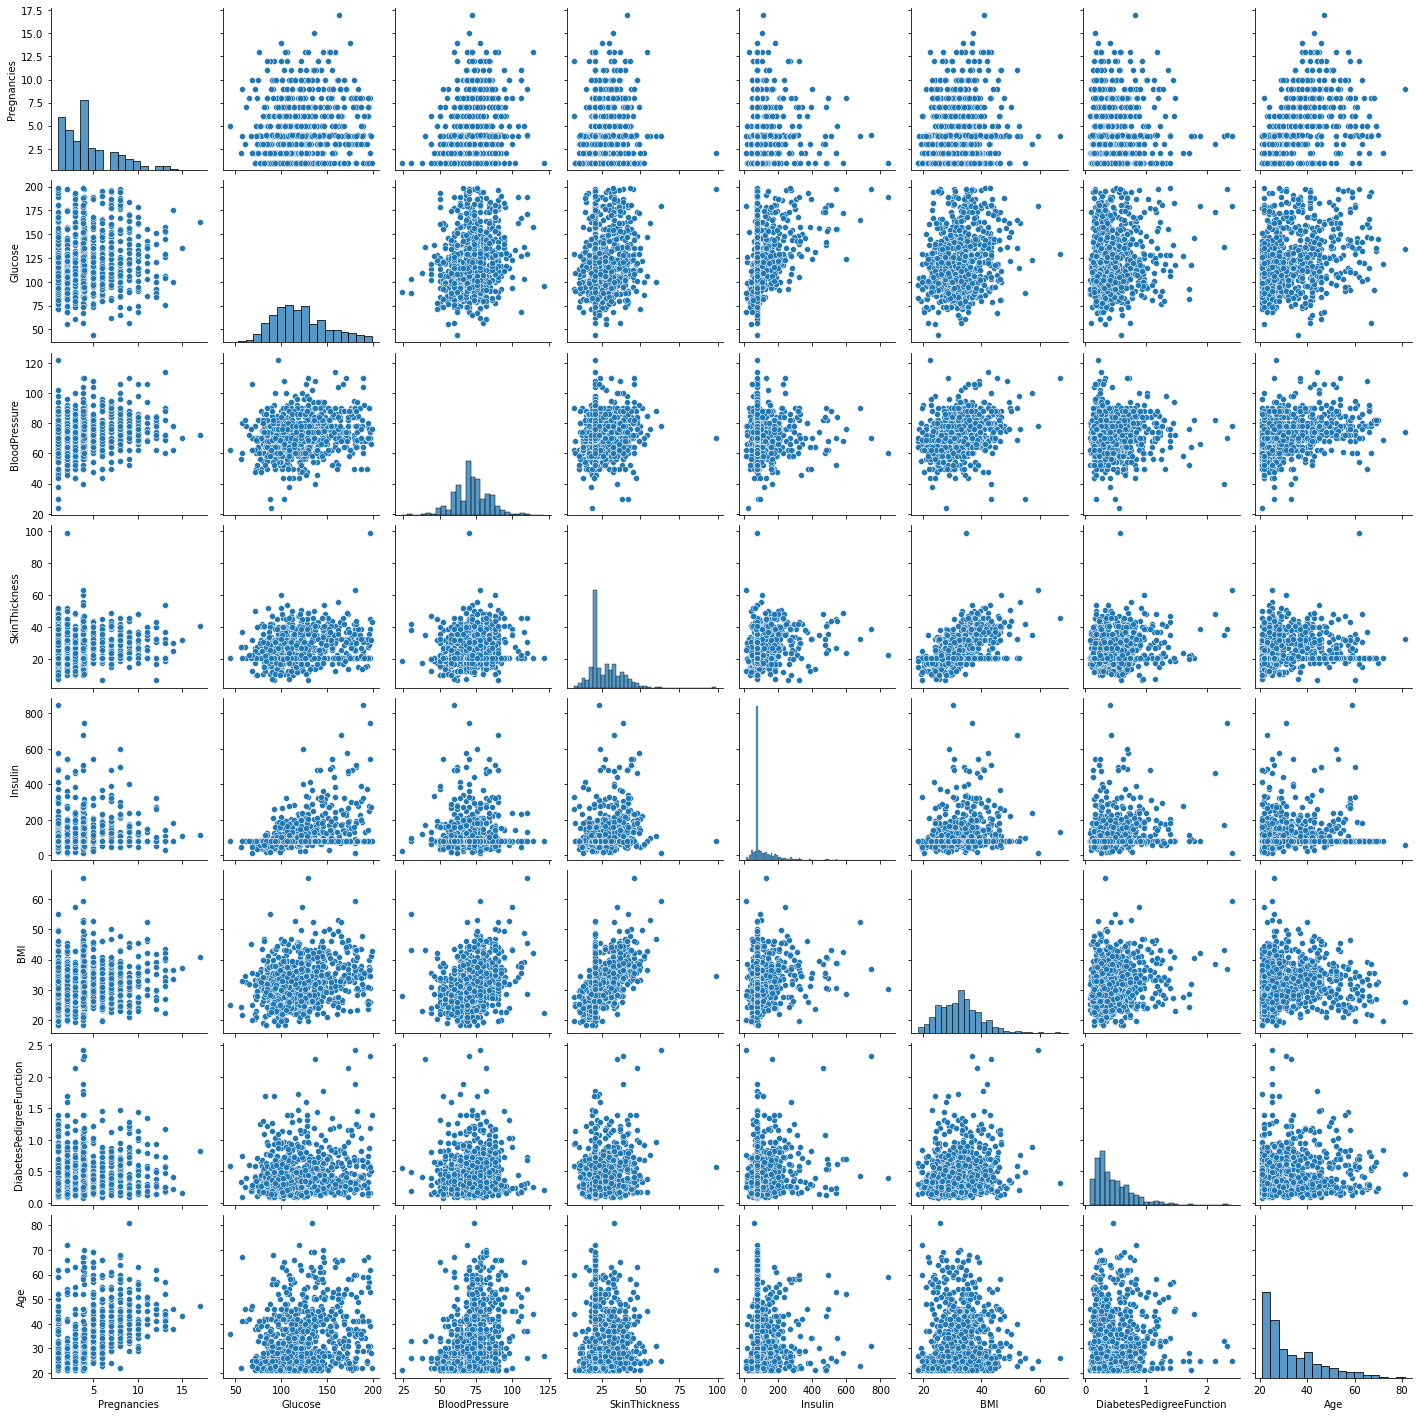

In [10]:
sns.pairplot(db1.iloc[:,:8])

In [11]:
X=db1.iloc[:,:8]
Y=db1.iloc[:,8]

In [12]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [13]:
# now since we are looking for KNN, we need to find out the sqrt of len(df1)
(len(db1))**0.5 #therefore our k value is 27

27.712812921102035

In [14]:
# now coming to the modelling part, first we need to perform scaling of the data
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)
X_train,X_test

(array([[-0.80281653,  0.04199528, -1.68560824, ...,  0.54832424,
          1.05409807, -0.40159301],
        [-0.16388297, -0.99717103, -0.33947633, ...,  1.07627365,
         -0.23685028, -0.66087599],
        [ 1.62125321,  1.44989801,  0.50185611, ...,  0.06318154,
         -0.92832377,  1.06767718],
        ...,
        [-1.14911221, -0.39378414, -1.34907526, ..., -1.02125507,
          1.10454892, -0.8337313 ],
        [-0.16388297, -0.86308505,  0.6701226 , ...,  0.59113095,
         -0.38820285, -0.57444833],
        [ 0.92866185, -0.49434862,  1.67972153, ..., -1.37797764,
         -0.6701341 ,  1.32696016]]),
 array([[-0.82413473,  0.48162044, -1.17126213, ..., -1.18222048,
          0.60457779, -0.95422951],
        [-1.12605445, -1.40248879,  0.06724802, ..., -0.44970021,
          0.03634074, -1.11860461],
        [-0.2202953 ,  0.57428155,  0.68650309, ...,  0.90386986,
          0.12554074,  0.11420868],
        ...,
        [-1.12605445, -0.13937791, -1.94533097, ..., -

In [15]:
# Y_train=Y_train.reshape(2,384)
# Y_train=sc.fit_transform(Y_train)
# ends up in error

In [16]:
#modelling
classifier=KNeighborsClassifier(n_neighbors=27,metric='euclidean')
classifier.fit(X_train,Y_train)
Y_pred=classifier.predict(X_test)
Y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
      dtype=int64)

In [17]:
#Evaluation
cm=confusion_matrix(Y_test,Y_pred)
print(cm)

[[85  6]
 [32 31]]


In [18]:
a_s=accuracy_score(Y_test,Y_pred)
print(a_s)

0.7532467532467533


In [19]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.73      0.93      0.82        91
           1       0.84      0.49      0.62        63

    accuracy                           0.75       154
   macro avg       0.78      0.71      0.72       154
weighted avg       0.77      0.75      0.74       154

